## Importing Libraries


In [1435]:
# !pip install --upgrade pip

In [1436]:
# !pip install -r ./requirements.txt

In [1437]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

#numpy and pandas for data manipulation
import pandas as pd
import numpy as np
import xgboost as xg
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt

#file system management
import os

## Reading the dataset


In [1438]:
df = pd.read_csv('./data/monatszahlen2209_verkehrsunfaelle.csv')
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [1439]:
df.isnull().sum()

MONATSZAHL                         0
AUSPRÄGUNG                         0
JAHR                               0
MONAT                              0
WERT                              84
VORJAHRESWERT                     91
VERÄND_VORMONAT_PROZENT          246
VERÄND_VORJAHRESMONAT_PROZENT    176
ZWÖLF_MONATE_MITTELWERT          238
dtype: int64

## Preprocessing the dataset


In [1440]:
# As mentioned, only first 5 columns are important
df = df.iloc[:,:5]
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN


In [1441]:
# Dropping data that comes after 2020
df = df[(df.JAHR <= 2020) ]
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0


## Exploratory Data Analysis

In [1442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 25 to 2085
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MONATSZAHL  1911 non-null   object 
 1   AUSPRÄGUNG  1911 non-null   object 
 2   JAHR        1911 non-null   int64  
 3   MONAT       1911 non-null   object 
 4   WERT        1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 89.6+ KB


In [1443]:
# percentage of data which is null in each column
(df.isna().sum() / df.shape[0]) * 100

MONATSZAHL    0.0
AUSPRÄGUNG    0.0
JAHR          0.0
MONAT         0.0
WERT          0.0
dtype: float64

In [1444]:
df["WERT"].describe()

count     1911.000000
mean      1440.540031
std       4655.514611
min          0.000000
25%         41.000000
50%        399.000000
75%        864.000000
max      46988.000000
Name: WERT, dtype: float64

In [1445]:
df["MONAT"].describe()

count      1911
unique      253
top       Summe
freq        147
Name: MONAT, dtype: object

In [1446]:
df["JAHR"].describe()

count    1911.000000
mean     2010.000000
std         6.056886
min      2000.000000
25%      2005.000000
50%      2010.000000
75%      2015.000000
max      2020.000000
Name: JAHR, dtype: float64

In [1447]:
df["AUSPRÄGUNG"].unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

In [1448]:
df["MONATSZAHL"].unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [1449]:
# Creating new_df for statistical analysis
new_df = df[['MONAT','WERT']]
new_df.head()

,MONAT,WERT
25,Summe,430.0
26,202001,28.0
27,202002,40.0
28,202003,27.0
29,202004,26.0


In [1450]:
new_df = new_df.reset_index(drop=True)

In [1451]:
new_df.head()

,MONAT,WERT
0,Summe,430.0
1,202001,28.0
2,202002,40.0
3,202003,27.0
4,202004,26.0


## EXploratory data analysis


In [1452]:
"""
Category Types :
Alkoholunf√§lle -> 0
Fluchtunf√§lle -> 1
Verkehrsunf√§lle -> 2

Accident Types :
insgesamt -> 0
mit Personensch√§den -> 1
Verletzte und Get√∂tete -> 2
"""

'\nCategory Types :\nAlkoholunf√§lle -> 0\nFluchtunf√§lle -> 1\nVerkehrsunf√§lle -> 2\n\nAccident Types :\ninsgesamt -> 0\nmit Personensch√§den -> 1\nVerletzte und Get√∂tete -> 2\n'

In [1453]:
"""
MONATSZAHL -> Category

AUSPRÄGUNG -> Accident Type (insgesamt means total for all subcategories)

JAHR -> Year

MONAT -> Month

WERT -> Value

"""

'\nMONATSZAHL -> Category\n\nAUSPRÄGUNG -> Accident Type (insgesamt means total for all subcategories)\n\nJAHR -> Year\n\nMONAT -> Month\n\nWERT -> Value\n\n'

         MONATSZAHL AUSPRÄGUNG  JAHR  MONAT   WERT
25   Alkoholunfälle  insgesamt  2020  Summe  430.0
38   Alkoholunfälle  insgesamt  2019  Summe  434.0
51   Alkoholunfälle  insgesamt  2018  Summe  398.0
64   Alkoholunfälle  insgesamt  2017  Summe  409.0
77   Alkoholunfälle  insgesamt  2016  Summe  301.0
90   Alkoholunfälle  insgesamt  2015  Summe  411.0
103  Alkoholunfälle  insgesamt  2014  Summe  382.0
116  Alkoholunfälle  insgesamt  2013  Summe  377.0
129  Alkoholunfälle  insgesamt  2012  Summe  440.0
142  Alkoholunfälle  insgesamt  2011  Summe  397.0
155  Alkoholunfälle  insgesamt  2010  Summe  402.0
168  Alkoholunfälle  insgesamt  2009  Summe  430.0
181  Alkoholunfälle  insgesamt  2008  Summe  482.0
194  Alkoholunfälle  insgesamt  2007  Summe  560.0
207  Alkoholunfälle  insgesamt  2006  Summe  599.0
220  Alkoholunfälle  insgesamt  2005  Summe  600.0
233  Alkoholunfälle  insgesamt  2004  Summe  659.0
246  Alkoholunfälle  insgesamt  2003  Summe  730.0
259  Alkoholunfälle  insgesamt 

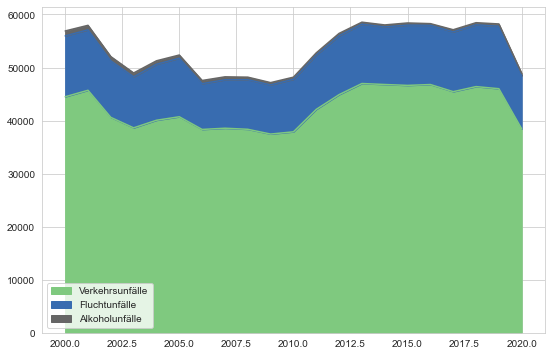

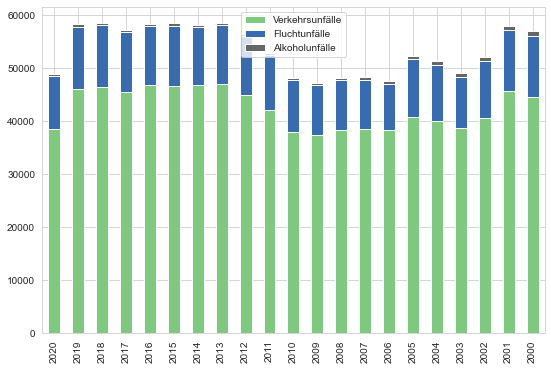

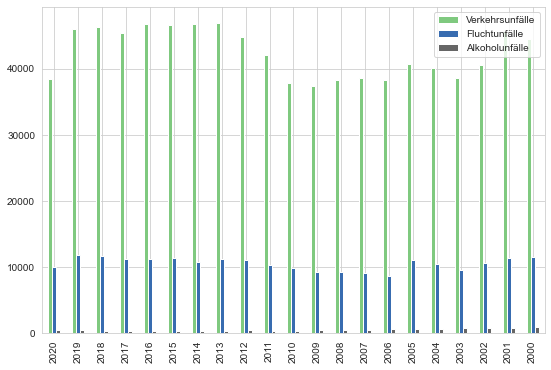

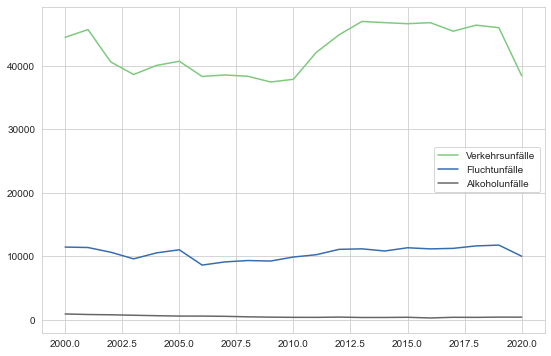

In [1454]:
# Data Visualization

accidents = df[df['JAHR'] < 2021]

Verkehrsunfälle = accidents[(
    (accidents['MONATSZAHL'] == 'Verkehrsunfälle') &
    (accidents['MONAT'] == 'Summe') &
    (accidents['AUSPRÄGUNG'] == 'insgesamt')
    )]
Fluchtunfälle = accidents[(
    (accidents['MONATSZAHL'] == 'Fluchtunfälle') &
    (accidents['MONAT'] == 'Summe') &
    (accidents['AUSPRÄGUNG'] == 'insgesamt')
    )]
Alkoholunfälle = accidents[(
    (accidents['MONATSZAHL'] == 'Alkoholunfälle') &
    (accidents['MONAT'] == 'Summe') &
    (accidents['AUSPRÄGUNG'] == 'insgesamt')
    )]
print(Alkoholunfälle)
years = [i for i in range(2000, 2021)]
years.sort(reverse=True)

accidents_category = pd.DataFrame({
        "Verkehrsunfälle": Verkehrsunfälle['WERT'].to_numpy(),
        "Fluchtunfälle": Fluchtunfälle['WERT'].to_numpy(),
        "Alkoholunfälle": Alkoholunfälle['WERT'].to_numpy()
    },
    index= years
)

accidents_category.plot(kind='area',colormap='Accent',)
plt.gcf().set_size_inches(9,6)
accidents_category.plot(kind='bar', colormap='Accent', stacked= True)
plt.gcf().set_size_inches(9,6)
accidents_category.plot(kind='bar', colormap='Accent')
plt.gcf().set_size_inches(9,6)
accidents_category.plot(colormap='Accent')
plt.gcf().set_size_inches(9,6)

In [1455]:
# # Remove the 'Summe' from Month column 
# df = df[df['MONAT'] != 'Summe']

# Monat has only 147 summe so removing them
lst = ['Summe']
df = df[df.MONAT.isin(lst) == False]

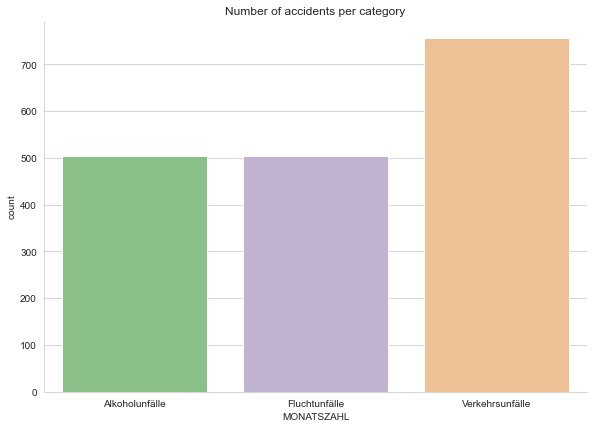

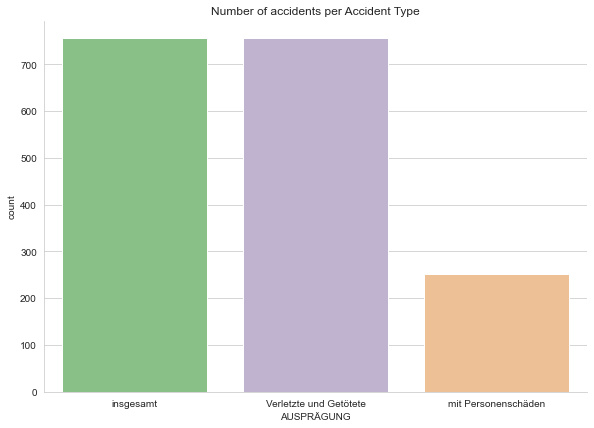

In [1456]:
# Plot Number of accidents per category
plot = sns.catplot(x="MONATSZAHL", kind="count", data=df, palette="Accent")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(9,6)

# Plot Number of accidents per Accident Type
plot = sns.catplot(x="AUSPRÄGUNG", kind="count", data=df, palette="Accent")
plt.title('Number of accidents per Accident Type')
plt.gcf().set_size_inches(9,6)

In [1457]:
df

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
30,Alkoholunfälle,insgesamt,2020,202005,40.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [1458]:
df.shape

(1764, 5)

In [1459]:
df = df.reset_index()

In [1460]:
# def func(x):
#     return int(x[-2:])

In [1461]:
df_final = df
df_final.head()

,index,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,26,Alkoholunfälle,insgesamt,2020,202001,28.0
1,27,Alkoholunfälle,insgesamt,2020,202002,40.0
2,28,Alkoholunfälle,insgesamt,2020,202003,27.0
3,29,Alkoholunfälle,insgesamt,2020,202004,26.0
4,30,Alkoholunfälle,insgesamt,2020,202005,40.0


In [1462]:
from datetime import datetime
def func1(date_str):
    date_obj = datetime.strptime(date_str, '%Y%m')
    return date_obj.strftime('%Y-%m-%d')

In [1463]:
df_final['MONAT'] = df_final['MONAT'].apply(func1)

In [1464]:
def func2(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d')

In [1465]:
df_final['MONAT'] = df_final['MONAT'].apply(func2)

In [1466]:
df_final.head()

,index,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,26,Alkoholunfälle,insgesamt,2020,2020-01-01,28.0
1,27,Alkoholunfälle,insgesamt,2020,2020-02-01,40.0
2,28,Alkoholunfälle,insgesamt,2020,2020-03-01,27.0
3,29,Alkoholunfälle,insgesamt,2020,2020-04-01,26.0
4,30,Alkoholunfälle,insgesamt,2020,2020-05-01,40.0


In [1467]:
import pandas as pd
import seaborn as sns

In [1468]:
df.tail()

,index,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
1759,2081,Verkehrsunfälle,Verletzte und Getötete,2000,2000-08-01,647.0
1760,2082,Verkehrsunfälle,Verletzte und Getötete,2000,2000-09-01,675.0
1761,2083,Verkehrsunfälle,Verletzte und Getötete,2000,2000-10-01,615.0
1762,2084,Verkehrsunfälle,Verletzte und Getötete,2000,2000-11-01,578.0
1763,2085,Verkehrsunfälle,Verletzte und Getötete,2000,2000-12-01,515.0


In [1469]:
df_meta = df_final

In [1470]:
# Changing the non-numeric objects into integers

# df_meta["MONAT"] = pd.to_numeric(df_meta["MONAT"])

# Changing the non-string objects into strings to be able to filter the df_meta

df_meta[['MONATSZAHL', 'AUSPRÄGUNG']] = df_meta[['MONATSZAHL', 'AUSPRÄGUNG']].astype(pd.StringDtype()) 

df_meta = df_meta.sort_values(by ='MONAT' , ascending=True) # Sort values by time

# Setting Accident Type as "insgesamt"

df_meta = df_meta.loc[(df_meta['AUSPRÄGUNG'] == 'insgesamt')]

df_meta.head()

,index,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
240,286,Alkoholunfälle,insgesamt,2000,2000-01-01,78.0
744,882,Fluchtunfälle,insgesamt,2000,2000-01-01,835.0
1248,1478,Verkehrsunfälle,insgesamt,2000,2000-01-01,3448.0
241,287,Alkoholunfälle,insgesamt,2000,2000-02-01,53.0
745,883,Fluchtunfälle,insgesamt,2000,2000-02-01,890.0


In [1471]:
# Creating df for 'Alkoholunfälle' which means "alcohol accidents"

df_alk = df_meta.loc[(df_meta['MONATSZAHL'] == 'Alkoholunfälle')]

# Creating df for 'Fluchtunfälle' which means "escape accidents"

df_flucht = df_meta.loc[(df_meta['MONATSZAHL'] == 'Fluchtunfälle')]

# Creating df for 'Verkehrsunfälle' which means "traffic accidents"

df_verkehr = df_meta.loc[(df_meta['MONATSZAHL'] == 'Verkehrsunfälle')]

## Generating trends


In [1472]:
def generate_historical_trends(df, cat_name):
    df = df[['MONAT','WERT']]

    # Add columns for year and month
    df['Year'] = df['MONAT'].dt.year
    df['Month'] = df['MONAT'].dt.month
    df['day'] = df['MONAT'].dt.day

    # Group by year and month, and calculate the mean value for each group
    monthly_means = df.groupby(['Year', 'Month'])['WERT'].mean().reset_index()

    # Convert year and month to a single date column
    monthly_means['MONAT'] = pd.to_datetime(monthly_means[['Year', 'Month']].assign(day=1))

    # Create the line plot using Seaborn
    sns.set_style('whitegrid')
    sns.lineplot(x='MONAT', y='WERT', data=monthly_means)

    # Save the plot to a file
    name = "./" + cat_name + ".png"
    print(name)

    # plt.figure(figsize=(12, 8))

    plt.savefig(name,dpi=200)

./Alkoholunfalle.png


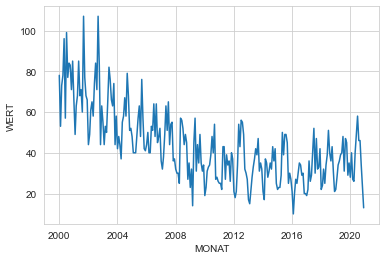

In [1473]:
generate_historical_trends(df_alk, 'Alkoholunfalle')

./Fluchtunfälle.png


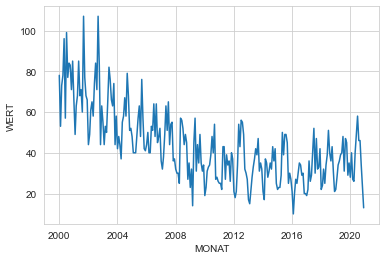

In [1474]:
generate_historical_trends(df_alk,'Fluchtunfälle')

./Verkehrsunfälle.png


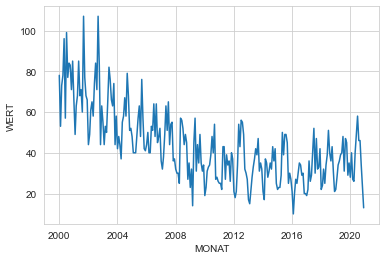

In [1475]:
generate_historical_trends(df_alk,'Verkehrsunfälle')

In [1476]:
df

,index,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,26,Alkoholunfälle,insgesamt,2020,2020-01-01,28.0
1,27,Alkoholunfälle,insgesamt,2020,2020-02-01,40.0
2,28,Alkoholunfälle,insgesamt,2020,2020-03-01,27.0
3,29,Alkoholunfälle,insgesamt,2020,2020-04-01,26.0
4,30,Alkoholunfälle,insgesamt,2020,2020-05-01,40.0
...,...,...,...,...,...,...
1759,2081,Verkehrsunfälle,Verletzte und Getötete,2000,2000-08-01,647.0
1760,2082,Verkehrsunfälle,Verletzte und Getötete,2000,2000-09-01,675.0
1761,2083,Verkehrsunfälle,Verletzte und Getötete,2000,2000-10-01,615.0
1762,2084,Verkehrsunfälle,Verletzte und Getötete,2000,2000-11-01,578.0


## Forecasting future accidents value 

In [1477]:
# Feature engineering
# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit and transform the data to label encode the categories
data_encoded_1 = le.fit_transform(df['AUSPRÄGUNG'])
data_encoded_2 = le.fit_transform(df['MONATSZAHL'])

df.drop(columns=['AUSPRÄGUNG','MONATSZAHL'])
df['AUSPRÄGUNG'] = pd.DataFrame(data_encoded_1)
df['MONATSZAHL'] = pd.DataFrame(data_encoded_2)

df.head()


,index,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,26,0,1,2020,2020-01-01,28.0
1,27,0,1,2020,2020-02-01,40.0
2,28,0,1,2020,2020-03-01,27.0
3,29,0,1,2020,2020-04-01,26.0
4,30,0,1,2020,2020-05-01,40.0


In [1478]:
# Changing the non-string objects into strings to be able to filter the df_meta

df['MONAT'] = df['MONAT'].astype(pd.StringDtype()) 


def func(x):
    return int(x[-2:])

df['MONAT'] = df['MONAT'].apply(func)

df.head()

,index,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT
0,26,0,1,2020,1,28.0
1,27,0,1,2020,1,40.0
2,28,0,1,2020,1,27.0
3,29,0,1,2020,1,26.0
4,30,0,1,2020,1,40.0


In [1479]:
# Final Pipeline
X = df[['MONATSZAHL','AUSPRÄGUNG','JAHR','MONAT']].values
y = df[['WERT']].values

In [1480]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [1481]:
X

array([[   0,    1, 2020,    1],
       [   0,    1, 2020,    1],
       [   0,    1, 2020,    1],
       ...,
       [   2,    0, 2000,    1],
       [   2,    0, 2000,    1],
       [   2,    0, 2000,    1]], dtype=int64)

In [1482]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1587
1587
177
177


## Linear Regression

In [1483]:
regressor_df = LinearRegression()
regressor_df.fit(X_train, y_train)

y_hat = regressor_df.predict(X_test)
rmse = mean_squared_error(y_test,y_hat, squared=False)
print("RMSE : % f" %(rmse))

RMSE :  931.580725


## XGBoost

In [1486]:
# get the datatype of the first row
X_test[0]

array([   2,    1, 2007,    1], dtype=int64)

In [ ]:
xgb_df = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators =10, seed = 123)
  
# Fitting the model
xgb_df.fit(X_train, y_train)
  
# Predict the model
y_hat = xgb_df.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_test, y_hat, squared=False))
print("RMSE : % f" %(rmse))

[20:55:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  13.122722


In [1493]:
inp = np.array([[1,1,2020,1]])
inp
xgb_df.predict(inp)

array([785.3047], dtype=float32)

In [ ]:
# Xgboost fully trained
xgb_final = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators =10, seed = 123)
  
# Fitting the model
xgb_final.fit(X, y)
  
# saving the model using pickle
import pickle

# Save the model as a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(xgb_final, f)

[20:55:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred_df = {'y_actual':[], 'y_pred':[]}
pred_df['y_actual'] = pd.DataFrame(y_test)
pred_df['y_pred'] = pd.DataFrame(y_hat)

In [ ]:
pred_df

{'y_actual':           0
 0    2643.0
 1     797.0
 2      39.0
 3    1095.0
 4    3529.0
 ..      ...
 172  1176.0
 173   545.0
 174    15.0
 175    20.0
 176    17.0
 
 [177 rows x 1 columns],
 'y_pred':                0
 0    3140.410156
 1     721.907471
 2      21.379116
 3     894.481201
 4    3269.238037
 ..           ...
 172   894.481201
 173   422.321289
 174    15.976789
 175    47.155125
 176    14.380253
 
 [177 rows x 1 columns]}